<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [6]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000000120317561, 1.2499999939841218, 0.5000000120317564]
  * f(x_sol) = 3
  * nb_iters = 8
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000000120317561, 1.2499999939841218, 0.5000000120317564]
  * f(x_sol) = 0.75
  * nb_iters = 8
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 100
  * nb_iters = 4
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
--------------------------------------

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

## Interprétation des résultats

### 1. Valeurs de λₖ et μₖ :

- Le nombre maximal d'itérations est fixé à 1000.
- Les valeurs de τ₁, τ₂, et τ₃ influencent les performances.
- Une augmentation de τ₂ peut accélérer l'algorithme, mais τ₃ augmente en sortie, indiquant des pénalités élevées pour les contraintes non respectées.
- λₖ et μₖ évoluent, reflétant l'impact des contraintes et de la pénalité.

### 2. Influence de τ :


La convergence de l'algorithme semble dépendre du paramètre τ. Une valeur plus faible favorise une meilleure convergence en réduisant les pénalités, tandis qu'une valeur plus élevée améliore la convergence globale. Cependant, le choix de τ doit être équilibré, car une valeur trop petite peut entraîner une perte de précision, tandis qu'une valeur trop grande peut compromettre la convergence. Ainsi, le réglage de τ doit être effectué avec précaution en tenant compte du critère d'arrêt sur la précision de la fonction pour garantir des résultats précis tout en assurant une convergence efficace.



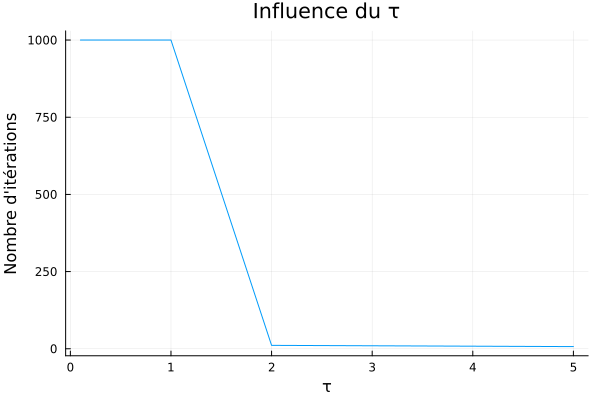

In [21]:
algos = ["newton", "rc-cauchy", "rc-gct"]
f1 = fct1
gf1 = grad_fct1
Hf1 = hess_fct1; c1 = contrainte1; gc1 = grad_contrainte1; Hc1 = hess_contrainte1
x0 = pts2.x01

using Plots

# Influence du 𝜏
τ = [0.1, 0.5, 1.0, 2.0, 5.0]
performances_τ = []

for to in τ
    _, _, _, nb_iters = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x0, algo_noc=algos[1], τ=to)
    push!(performances_τ, nb_iters)
end

plot(rayons_initiaux, performances_τ, xlabel="τ", ylabel="Nombre d'itérations", legend=false, title="Influence du τ")

